In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 
import datetime as dt

In [403]:
pharma = pd.read_csv(r"C:\Users\hp\Downloads\Python Case Study\Case Study 4 - Python Visualizations Case Study\SalesData.csv")
pharma.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [405]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [407]:
pharma.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [409]:
pharma.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

### Q1. Compare Sales by region for 2016 with 2015 using bar chart

In [412]:
region_sales= pharma.groupby('Region')[['Sales2015','Sales2016']].sum().add_prefix('Total_')
region_sales

,Total_Sales2015,Total_Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


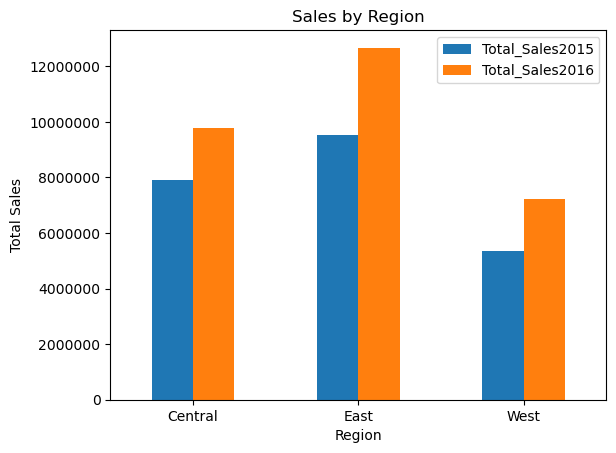

In [654]:
region_sales.plot(kind='bar', rot=0 , title= 'Sales by Region')
plt.ylabel('Total Sales')
plt.ticklabel_format(axis='y' , style= 'plain')
plt.show()

### Q2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [417]:
region_sales_2016= pharma.groupby('Region')[['Sales2016']].sum().add_prefix('Total_')
region_sales_2016

,Total_Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


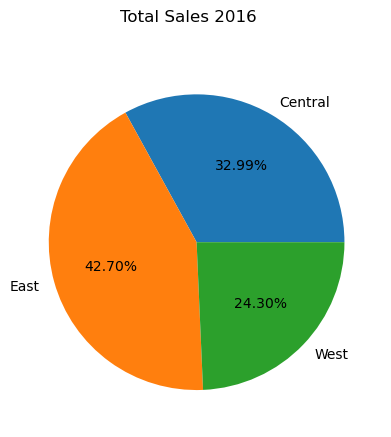

In [652]:
region_sales_2016.plot(kind='pie', subplots= True , ylabel='', title='Total Sales 2016', legend= False , autopct='%.2f%%' )
plt.show()

### Q3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [422]:
reg_tier_sale= pharma.groupby(['Region','Tier'])[['Sales2015','Sales2016']].sum().reset_index()
reg_tier_sale = reg_tier_sale.melt(id_vars=['Region', 'Tier'], value_vars=['Sales2015', 'Sales2016'], var_name='Year', value_name='Sales')
reg_tier_sale

,Region,Tier,Year,Sales
0,Central,High,Sales2015,4.798698e+06
1,Central,Low,Sales2015,9.434397e+05
2,Central,Med,Sales2015,2.068226e+06
3,Central,Out,Sales2015,8.136489e+04
4,East,High,Sales2015,6.102946e+06
5,East,Low,Sales2015,9.016658e+05
6,East,Med,Sales2015,2.470998e+06
7,East,Out,Sales2015,3.730655e+04
8,West,High,Sales2015,2.944789e+06
9,West,Low,Sales2015,6.710644e+05


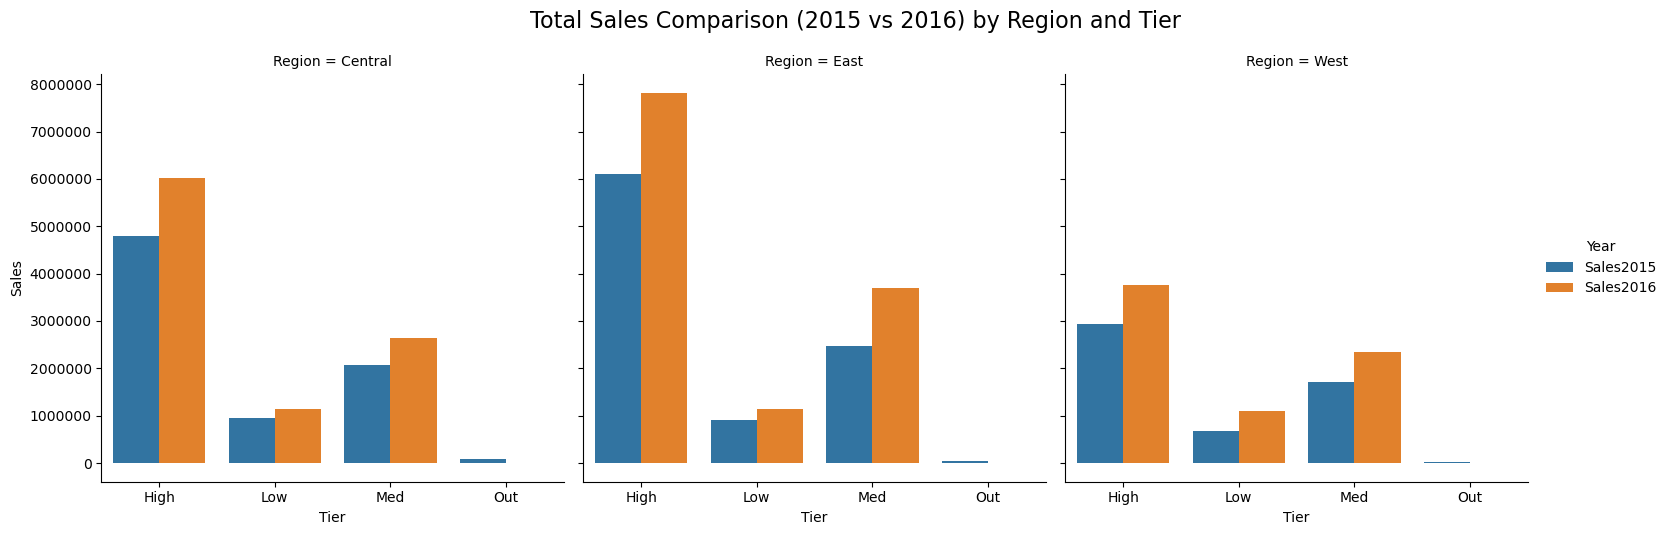

In [648]:
sns.catplot(reg_tier_sale, x='Tier', y='Sales', hue='Year', col='Region', kind='bar')
plt.suptitle('Total Sales Comparison (2015 vs 2016) by Region and Tier', fontsize=16, y=1.06)
plt.ticklabel_format(axis='y' , style= 'plain')
plt.show()

### Q4. In East region, which state registered a decline in 2016 as compared to 2015?

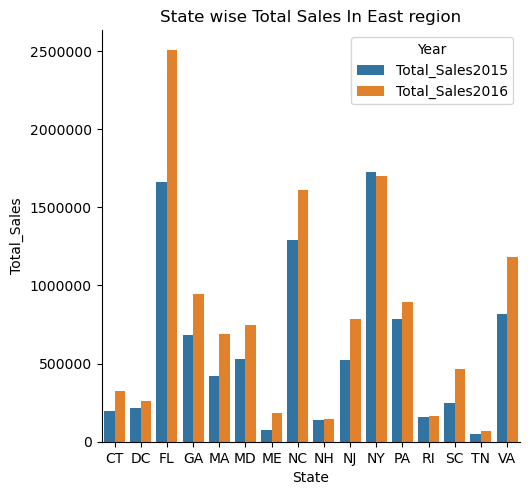

In [646]:
### By using seaborn ():

East_State1= pharma[pharma.Region== 'East'].groupby('State')[['Sales2015','Sales2016']].sum().add_prefix('Total_').reset_index()
East_State1 = East_State1.melt(id_vars= 'State' , value_vars=['Total_Sales2015','Total_Sales2016'], var_name='Year' , value_name='Sales')
sns.catplot(East_State1 , x='State', y='Sales', hue='Year', kind='bar' , legend_out= False )
plt.title('State wise Total Sales In East region')
plt.ylabel('Total_Sales')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

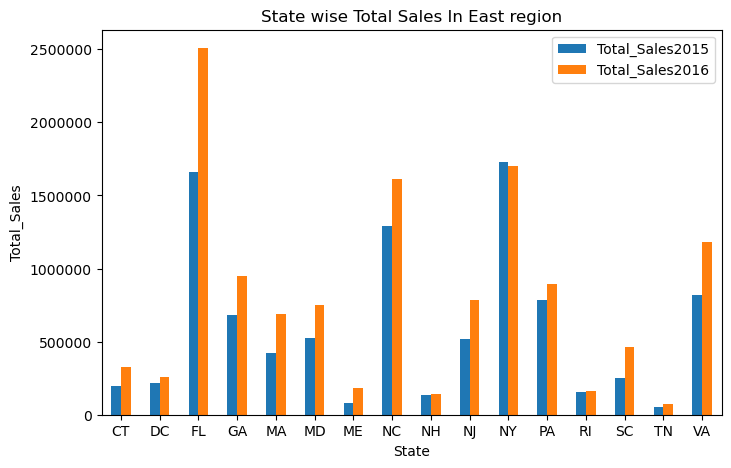

In [640]:
### By using Pandas:

East_State= pharma[pharma.Region== 'East'].groupby('State')[['Sales2015','Sales2016']].sum().add_prefix('Total_').reset_index()
East_State.plot(kind='bar', x='State', rot = 0, figsize=(8,5))
plt.title('State wise Total Sales In East region')
plt.ylabel('Total_Sales')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Q5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

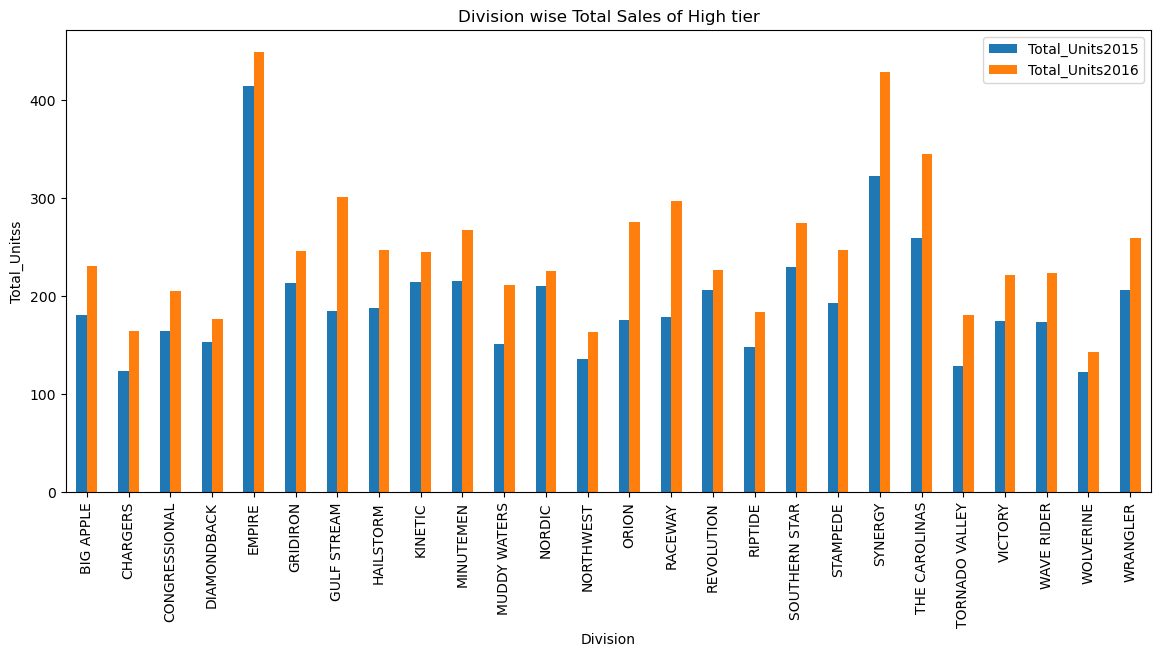

In [567]:
Division_Sales= pharma[pharma.Tier == 'High'].groupby('Division')[['Units2015','Units2016']].sum().add_prefix('Total_').reset_index()
Division_Sales.plot(kind='bar' , x='Division' , figsize=(14,6), title='Division wise Total Sales of High tier')
plt.ylabel('Total_Unitss')
plt.show()

### Q6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
        • Jan - Mar : Q1
        • Apr - Jun : Q2
        • Jul - Sep : Q3
        • Oct - Dec : Q4

In [544]:
month_no= pd.to_datetime(pharma.Month, format='%b').dt.month
pharma['Qtr']= pd.cut(month_no , bins=[0,3,6,9,12], labels=['Q1','Q2','Q3','Q4'])

### Q7. Compare Qtr wise sales in 2015 and 2016 in a bar plot.

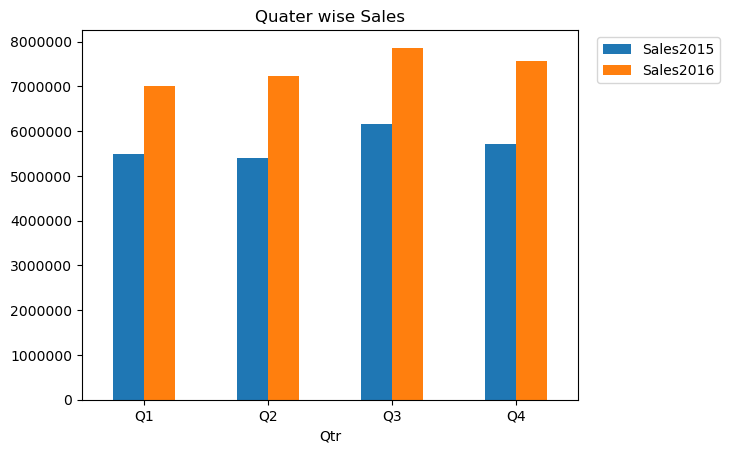

In [656]:
Qtr_Sales= pharma.groupby('Qtr', observed= False)[['Sales2015','Sales2016']].sum().reset_index()
Qtr_Sales.plot(kind='bar', x='Qtr', rot=0, title='Quater wise Sales' )
plt.legend( bbox_to_anchor=(1.3, 1.0))
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Q8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart. 
**(Draw 4 pie charts representing a Quarter for each Tier)**

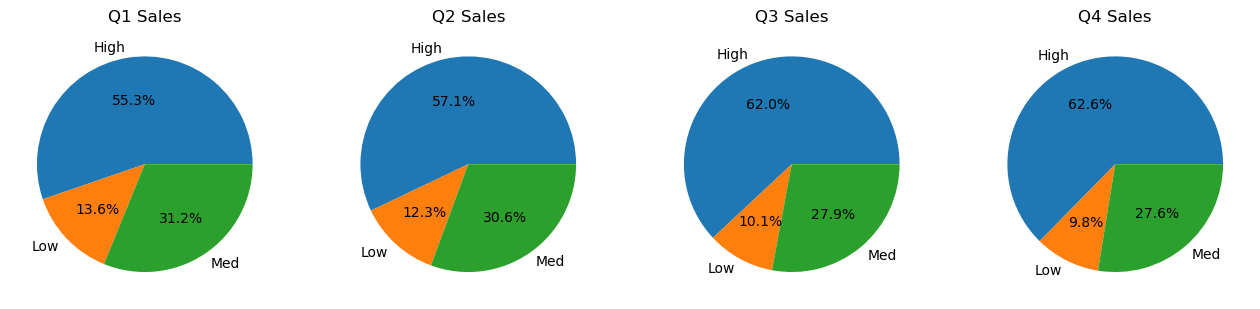

In [738]:
Qtr_tier_sales= pharma.groupby(['Qtr','Tier'],observed= False)[['Sales2016']].sum().reset_index()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
plt.figure(figsize=(16, 4))
for i, qtr in enumerate(quarters):
    plt.subplot(1, 4, i+1)
    data = Qtr_tier_sales[Qtr_tier_sales['Qtr'] == qtr]
    data = data[data['Sales2016'] > 0]
    
    if not data.empty:
        plt.pie(data['Sales2016'], labels=data['Tier'], autopct='%1.1f%%')
        plt.title(f'{qtr} Sales')
    else:
        plt.text(0.5, 0.5, 'No Data', ha='center', va='center')
        plt.axis('off')

In [722]:
Qtr_tier_sales

,Qtr,Tier,Sales2016
0,Q1,High,3.867719e+06
1,Q1,Low,9.488328e+05
2,Q1,Med,2.181402e+06
3,Q1,Out,0.000000e+00
4,Q2,High,4.130953e+06
5,Q2,Low,8.905948e+05
6,Q2,Med,2.215814e+06
7,Q2,Out,0.000000e+00
8,Q3,High,4.872559e+06
9,Q3,Low,7.951777e+05
